## Customer Segmentation Project

### Importing all the relevant library used in this project

In [1]:
# importing the relevant library for this project
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format


# showing all the collumns on output
pd.set_option('display.max_columns', 999)


### Loading our data set 

In [28]:
# loading  our data

df_sheets = pd.read_excel("./data/online_retail_II.xlsx", sheet_name= [0,1])

df = pd.concat(df_sheets.values(), ignore_index=True)

df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


### Checking for the data types and null values.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


This data set contains eight features. Out of the eight features description and customer ID contains null values.

In [30]:
df[["Quantity","Price"]].describe()

,Quantity,Price
count,1067371.00,1067371.00
mean,9.94,4.65
std,172.71,123.55
min,-80995.00,-53594.36
25%,1.00,1.25
50%,3.00,2.10
75%,10.00,4.15
max,80995.00,38970.00


The above is the general statistics for the numerical features. In the above statistics the minimum value for the quantity and price is negative which is not very logical.

There is a need to look into that during data cleaning.

In [31]:
df.describe(include= 'O')

,Invoice,StockCode,Description,Country
count,1067371,1067371,1062989,1067371
unique,53628,5305,5698,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1350,5829,5918,981330


- There are 40 unique countries in country column.
- The most frequent country is United Kingdom.

In [32]:
df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [33]:
df[df['Quantity']<0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


- A deep look into the negative quantity of the products.
- We further note that the invoice number of these products with negative quantity have a prefix "C"

In [34]:
df['Invoice']=df['Invoice'].astype("str")
df[df["Invoice"].str.match("^\\d{6}$")==False].sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
42189,C492932,20685,RED SPOTTY COIR DOORMAT,-8,2009-12-21 12:17:00,6.75,16772.00,United Kingdom
640972,C546131,21218,RED SPOTTY BISCUIT TIN,-1,2011-03-09 15:08:00,3.75,16057.00,United Kingdom
750748,C556647,22993,SET OF 4 PANTRY JELLY MOULDS,-12,2011-06-13 16:14:00,1.25,13012.00,United Kingdom
678027,C549666,22176,BLUE OWL SOFT TOY,-1,2011-04-11 12:17:00,2.95,13113.00,United Kingdom
520327,C537756,84949,SILVER HANGING T-LIGHT HOLDER,-8,2010-12-08 11:33:00,1.65,14952.00,United Kingdom
370527,C525168,21642,ASSORTED TUTTI FRUTTI PEN,-24,2010-10-04 12:15:00,0.85,14911.00,EIRE
465844,C533347,21258,VICTORIAN SEWING BOX LARGE,-6,2010-11-17 09:15:00,10.95,15100.00,United Kingdom
413839,C528932,22636,CHILDS BREAKFAST SET CIRCUS PARADE,-1,2010-10-25 15:09:00,8.50,17732.00,United Kingdom
569673,C540158,22423,REGENCY CAKESTAND 3 TIER,-2,2011-01-05 11:42:00,10.95,12471.00,Germany
761360,C557651,23173,REGENCY TEAPOT ROSES,-2,2011-06-21 17:20:00,8.15,17428.00,United Kingdom


- Filtering collumns where invoice number does not contain exactly six digits.

In [35]:
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

- we identify the non-numeric part of the invoce number.

In [36]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
825443,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


- According to the description collumn of rows where invoice start with prefix A, it shows this is an adjustment due to bad debt.

In [37]:
df["StockCode"]=df["StockCode"].astype("str")

df[(df["StockCode"].str.match("^\\d{5}$")==False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")==False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE',
       'DCGS0055', 'DCGS0074', 'DCGS0057', 'DCGS0073', 'DCGS0071',
       'DCGS0066P', 'DCGS0067', 'CRUK'], dtype=object)

## Data cleaning

In [38]:
# Create a deep copy of the original DataFrame 'df' and store it in 'cleaned_df'
cleaned_df = df.copy()

In [39]:
# Convert the 'Invoice' column to string type to handle it as text
cleaned_df["Invoice"]=cleaned_df["Invoice"].astype("str")

mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$")== True
)

# Filter the DataFrame to keep only rows where the 'Invoice' column contains exactly 6 digits.

cleaned_df = cleaned_df[mask]
cleaned_df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [40]:
# Convert the "StockCode" column to string type

cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$")==True)
    |(cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")==True)
    |(cleaned_df["StockCode"].str.match("^PADS$")==True)
)

# Apply the mask to filter the DataFrame, keeping only rows that match the specified patterns

cleaned_df = cleaned_df[mask]

cleaned_df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [41]:
# general statistics for the cleaned_df

cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1043010.00,1043010,1043010.00,802711.00
mean,10.62,2011-01-03 08:46:03.003882496,3.32,15338.07
min,-9600.00,2009-12-01 07:45:00,0.00,12346.00
25%,1.00,2010-07-11 10:49:00,1.25,13988.00
50%,3.00,2010-12-07 15:28:00,2.10,15276.00
75%,10.00,2011-07-24 10:37:00,4.13,16809.00
max,80995.00,2011-12-09 12:50:00,1157.15,18287.00
std,135.47,NaN,4.73,1693.93


In [42]:
# Drop rows from the DataFrame where the "Customer ID" column has missing values.

cleaned_df.dropna(subset="Customer ID", inplace=True)

In [43]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,802711.00,802711,802711.00,802711.00
mean,13.34,2011-01-02 09:20:34.073732864,2.93,15338.07
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-07-07 11:53:00,1.25,13988.00
50%,5.00,2010-12-03 14:54:00,1.95,15276.00
75%,12.00,2011-07-28 13:02:00,3.75,16809.00
max,80995.00,2011-12-09 12:50:00,649.50,18287.00
std,144.54,NaN,4.28,1693.93


In [44]:
cleaned_df[cleaned_df["Price"]==0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.00,16126.00,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.00,15658.00,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.00,15070.00,United Kingdom
...,...,...,...,...,...,...,...,...
979924,575579,22437,SET OF 9 BLACK SKULL BALLOONS,20,2011-11-10 11:49:00,0.00,13081.00,United Kingdom
979925,575579,22089,PAPER BUNTING VINTAGE PAISLEY,24,2011-11-10 11:49:00,0.00,13081.00,United Kingdom
1004540,577129,22464,HANGING METAL HEART LANTERN,4,2011-11-17 19:52:00,0.00,15602.00,United Kingdom
1006110,577314,23407,SET OF 2 TRAYS HOME SWEET HOME,2,2011-11-18 13:23:00,0.00,12444.00,Norway


In [45]:
len(cleaned_df[cleaned_df["Price"]==0])

62

In [46]:
cleaned_df =cleaned_df[cleaned_df["Price"]>0.0]

In [47]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,802649.00,802649,802649.00,802649.00
mean,13.32,2011-01-02 09:19:54.210121984,2.93,15338.15
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-07-07 11:53:00,1.25,13988.00
50%,5.00,2010-12-03 14:54:00,1.95,15276.00
75%,12.00,2011-07-28 13:02:00,3.75,16809.00
max,80995.00,2011-12-09 12:50:00,649.50,18287.00
std,143.87,NaN,4.28,1693.90


## Feature Engineering

In [48]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"]*cleaned_df["Price"]

cleaned_df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom,39.60
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom,59.50
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom,30.60
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom,45.00


In [49]:
agg_df = cleaned_df.groupby(by="Customer ID", as_index=False) \
.agg(
    MonetaryValue=("SalesLineTotal", "sum"),
    Frequency = ("Invoice", "nunique"),
    LastInvoiceDate = ("InvoiceDate", "max")
)

agg_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,77352.96,3,2011-01-18 10:01:00
1,12347.00,5633.32,8,2011-12-07 15:52:00
2,12348.00,1658.40,5,2011-09-25 13:13:00
3,12349.00,3678.69,3,2011-11-21 09:51:00
4,12350.00,294.40,1,2011-02-02 16:01:00


In [50]:
recent_invoice_date = agg_df["LastInvoiceDate"].max()
recent_invoice_date

Timestamp('2011-12-09 12:50:00')

In [51]:
agg_df["Recency"] = (recent_invoice_date-agg_df["LastInvoiceDate"]).dt.days
agg_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,77352.96,3,2011-01-18 10:01:00,325
1,12347.00,5633.32,8,2011-12-07 15:52:00,1
2,12348.00,1658.40,5,2011-09-25 13:13:00,74
3,12349.00,3678.69,3,2011-11-21 09:51:00,18
4,12350.00,294.40,1,2011-02-02 16:01:00,309
5,12351.00,300.93,1,2010-11-29 15:23:00,374
6,12352.00,1729.54,9,2011-11-03 14:37:00,35
7,12353.00,406.76,2,2011-05-19 17:47:00,203
8,12354.00,1079.40,1,2011-04-21 13:11:00,231
9,12355.00,947.61,2,2011-05-09 13:49:00,213


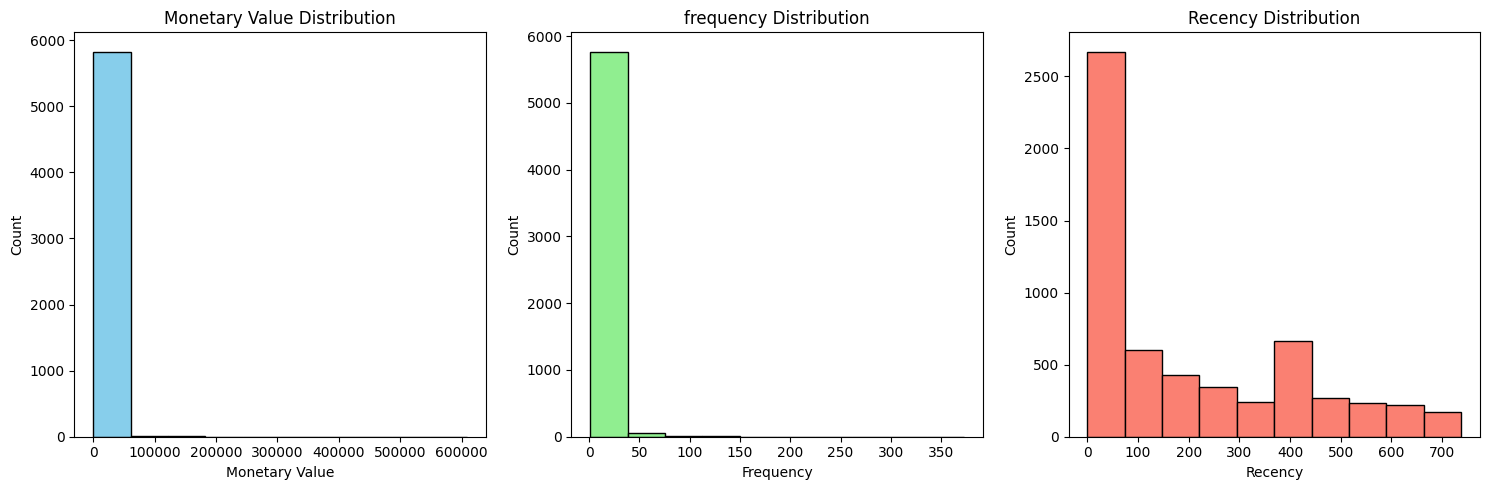

In [52]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(agg_df["MonetaryValue"], bins=10, color="skyblue", edgecolor="black")
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
plt.hist(agg_df["Frequency"], bins=10, color="lightgreen", edgecolor="black")
plt.title("frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
plt.hist(agg_df["Recency"], bins=10, color="salmon", edgecolor="black")
plt.title("Recency Distribution")
plt.xlabel("Recency")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

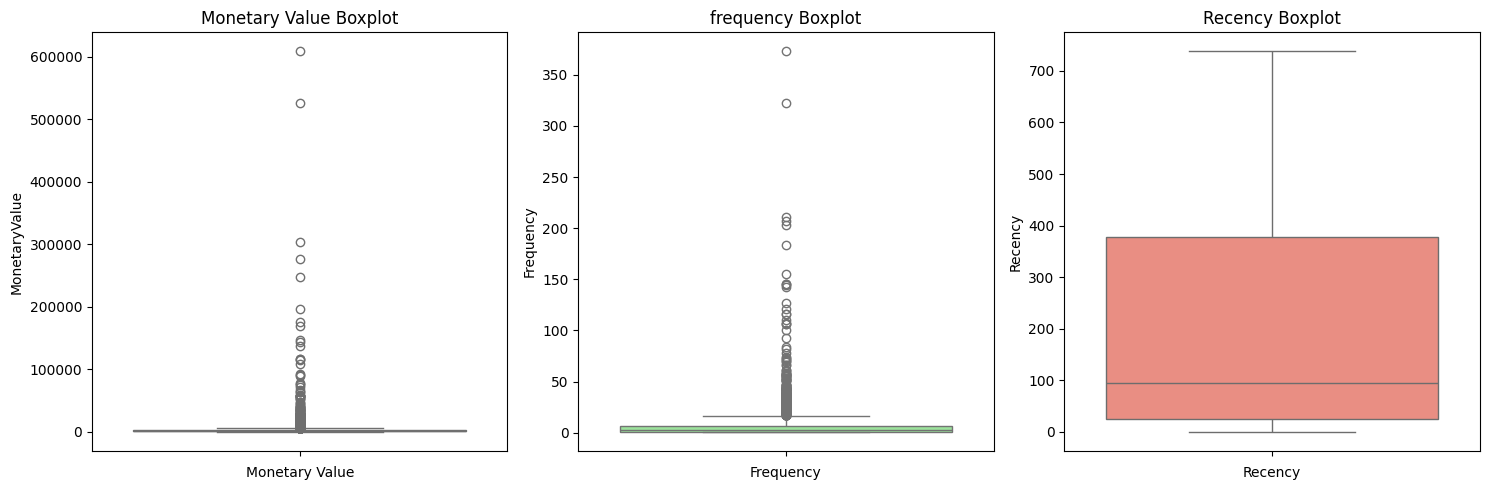

In [53]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.boxplot(data= agg_df["MonetaryValue"], color="skyblue")
plt.title("Monetary Value Boxplot")
plt.xlabel("Monetary Value")

plt.subplot(1, 3, 2)
sns.boxplot(data=agg_df["Frequency"], color="lightgreen")
plt.title("frequency Boxplot")
plt.xlabel("Frequency")

plt.subplot(1, 3, 3)
sns.boxplot(data=agg_df["Recency"], color="salmon")
plt.title("Recency Boxplot")
plt.xlabel("Recency")


plt.tight_layout()
plt.show()

In [54]:
M_Q1 = agg_df["MonetaryValue"].quantile(0.25)
M_Q3 = agg_df["MonetaryValue"].quantile(0.75)

M_IQR = M_Q3-M_Q1

monetary_outlier_df = agg_df[(agg_df["MonetaryValue"]>(M_Q3+1.5*M_IQR)) | (agg_df["MonetaryValue"]<(M_Q1-1.5*M_IQR))].copy()

monetary_outlier_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,620.00,620.00,620.00,620,620.00
mean,15077.78,18260.64,25.98,2011-10-19 01:33:52.548387072,50.98
min,12346.00,5217.44,1.00,2010-01-17 11:33:00,0.00
25%,13573.00,6591.86,12.00,2011-10-23 01:02:00,4.00
50%,14924.00,9131.81,18.00,2011-11-23 12:34:30,16.00
75%,16607.50,14486.35,29.00,2011-12-05 10:27:30,47.25
max,18260.00,608821.65,373.00,2011-12-09 12:49:00,691.00
std,1754.42,41750.24,31.13,NaN,102.87


In [55]:
F_Q1 = agg_df["Frequency"].quantile(0.25)
F_Q3 = agg_df["Frequency"].quantile(0.75)

F_IQR = F_Q3-F_Q1

Frequency_outlier_df = agg_df[(agg_df["Frequency"]>(F_Q3+1.5*F_IQR)) | (agg_df["Frequency"]<(F_Q1-1.5*F_IQR))].copy()

Frequency_outlier_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,424.00,424.00,424.00,424,424.00
mean,15373.75,21143.85,34.87,2011-11-08 06:13:43.160377344,30.79
min,12415.00,1820.44,17.00,2010-05-12 16:51:00,0.00
25%,13851.00,6368.09,20.00,2011-11-15 04:14:45,2.75
50%,15306.00,9760.71,25.00,2011-11-30 11:27:30,9.00
75%,16947.25,16691.30,35.00,2011-12-06 12:59:15,24.00
max,18283.00,608821.65,373.00,2011-12-09 12:49:00,575.00
std,1777.62,49369.50,34.68,NaN,70.63


In [56]:
non_outlier_df = agg_df[(~agg_df.index.isin(monetary_outlier_df.index)) & (~agg_df.index.isin(Frequency_outlier_df.index))]

non_outlier_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,5167.00,5167.00,5167.00,5167,5167.00
mean,15341.72,1133.52,3.69,2011-05-04 02:42:25.140313600,218.90
min,12348.00,2.95,1.00,2009-12-01 10:49:00,0.00
25%,13862.50,311.03,1.00,2010-11-11 13:06:30,32.00
50%,15355.00,717.51,3.00,2011-07-28 14:08:00,133.00
75%,16811.50,1579.13,5.00,2011-11-06 13:22:30,392.00
max,18287.00,5202.97,16.00,2011-12-09 12:50:00,738.00
std,1705.11,1128.97,3.19,NaN,211.12


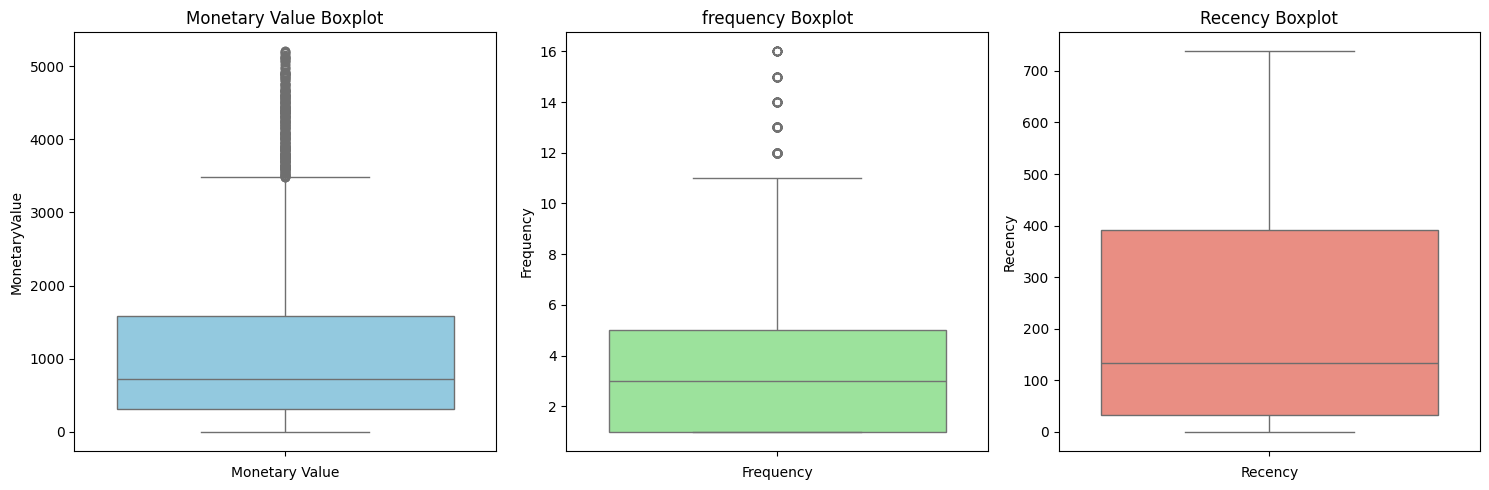

In [57]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.boxplot(data= non_outlier_df["MonetaryValue"], color="skyblue")
plt.title("Monetary Value Boxplot")
plt.xlabel("Monetary Value")

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outlier_df["Frequency"], color="lightgreen")
plt.title("frequency Boxplot")
plt.xlabel("Frequency")

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outlier_df["Recency"], color="salmon")
plt.title("Recency Boxplot")
plt.xlabel("Recency")


plt.tight_layout()
plt.show()

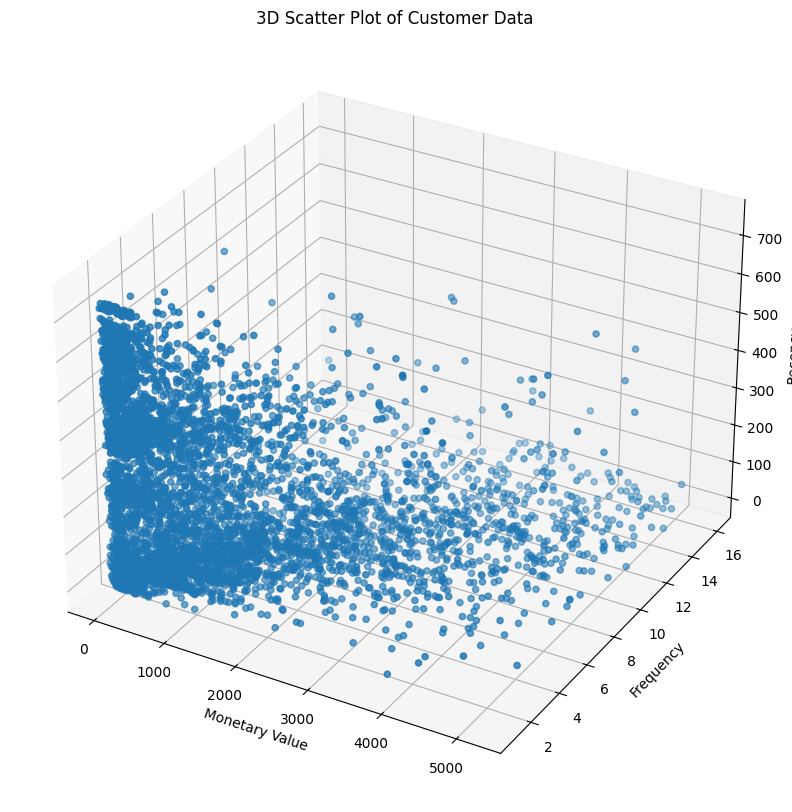

In [58]:
fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(projection= "3d")
scatter = ax.scatter(non_outlier_df["MonetaryValue"], non_outlier_df["Frequency"], non_outlier_df["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of Customer Data")

plt.show()

In [59]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outlier_df[["MonetaryValue", "Frequency", "Recency"]])
scaled_data

array([[ 0.46495994,  0.41035762, -0.68639195],
       [ 2.25462817, -0.21575129, -0.95167175],
       [-0.74333563, -0.84186021,  0.42683577],
       ...,
       [-0.67016465, -0.84186021,  2.08957165],
       [ 0.10001748, -0.52880575,  1.21793803],
       [ 2.65706855,  1.03646654, -0.8379804 ]])

In [60]:
scaled_data_df = pd.DataFrame(scaled_data, index = non_outlier_df.index, columns=("MonetaryValue", "Frequency", "Recency"))
scaled_data_df.head()

,MonetaryValue,Frequency,Recency
2,0.46,0.41,-0.69
3,2.25,-0.22,-0.95
4,-0.74,-0.84,0.43
5,-0.74,-0.84,0.73
6,0.53,1.66,-0.87


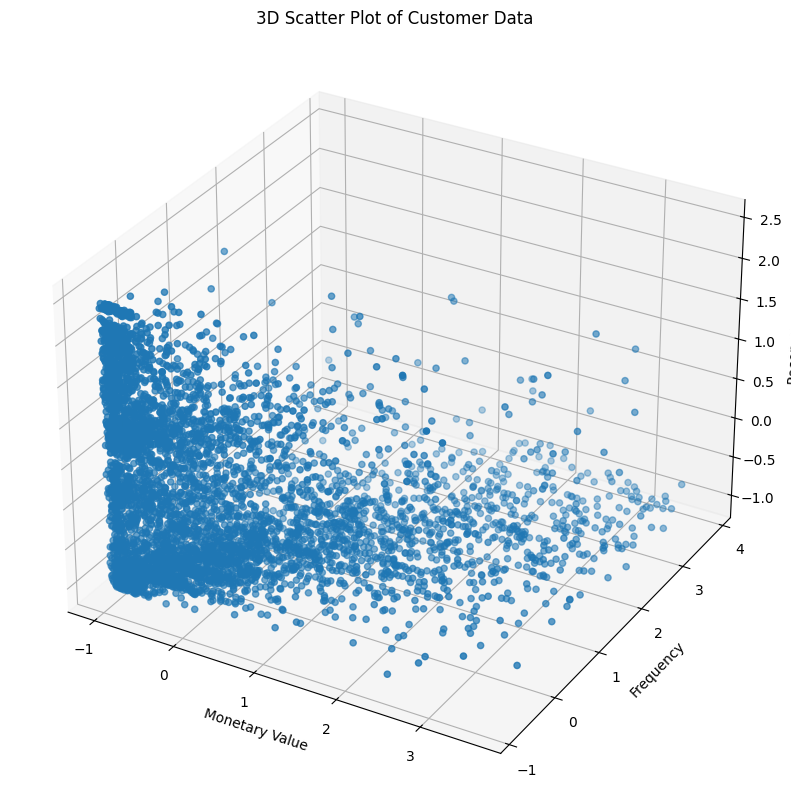

In [61]:
fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(projection= "3d")
scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of Customer Data")

plt.show()

## Kmeans Clustering

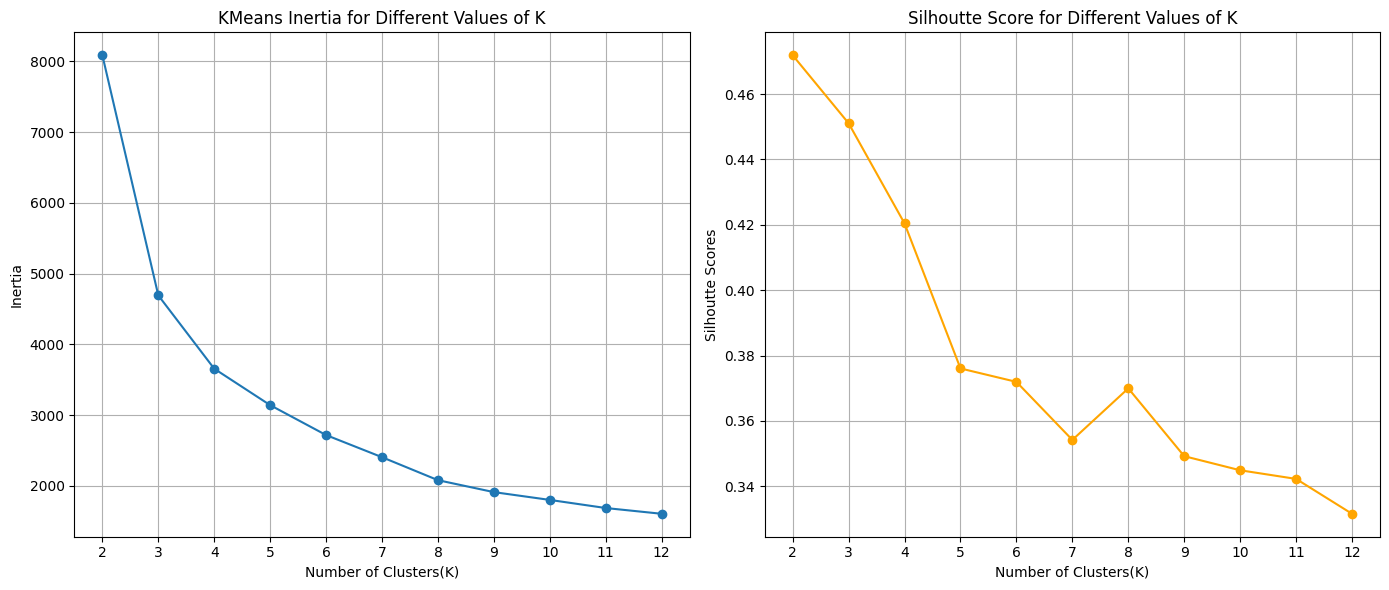

In [62]:
max_k = 12

silhouette_scores = []
inertia = []
k_values = range(2, max_k+1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker = "o")
plt.title("KMeans Inertia for Different Values of K")
plt.xlabel("Number of Clusters(K)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker = "o", color="orange")
plt.title("Silhoutte Score for Different Values of K")
plt.xlabel("Number of Clusters(K)")
plt.ylabel("Silhoutte Scores")
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [63]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)
cluster_labels

array([2, 2, 1, ..., 1, 1, 0])

In [64]:
non_outlier_df["Cluster"] = cluster_labels

non_outlier_df.head(10)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4456\2418825994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outlier_df["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.00,1658.40,5,2011-09-25 13:13:00,74,2
3,12349.00,3678.69,3,2011-11-21 09:51:00,18,2
4,12350.00,294.40,1,2011-02-02 16:01:00,309,1
5,12351.00,300.93,1,2010-11-29 15:23:00,374,1
6,12352.00,1729.54,9,2011-11-03 14:37:00,35,2
7,12353.00,406.76,2,2011-05-19 17:47:00,203,3
8,12354.00,1079.40,1,2011-04-21 13:11:00,231,3
9,12355.00,947.61,2,2011-05-09 13:49:00,213,3
12,12358.00,3447.07,5,2011-12-08 10:26:00,1,2
14,12360.00,3612.89,6,2011-10-18 15:22:00,51,0


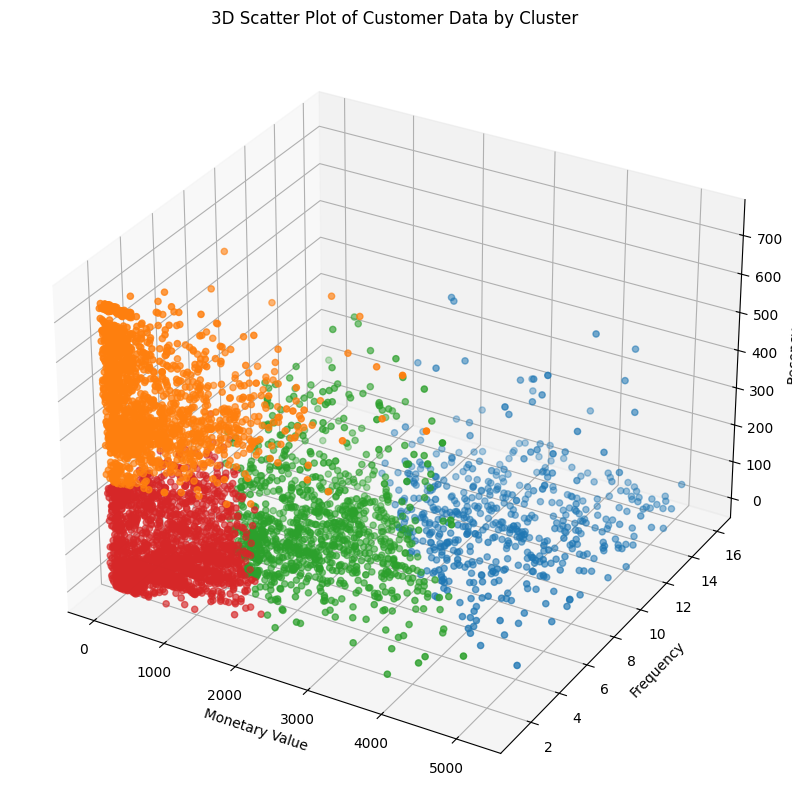

In [65]:
cluster_colors = {0: '#1f77b4',   #blue
                  1: '#ff7f0e',   #orange
                  2: '#2ca02c',   #green 
                  3: '#d62728'}   #red


colors = non_outlier_df["Cluster"].map(cluster_colors)

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection= "3d")
scatter = ax.scatter(non_outlier_df["MonetaryValue"], 
                     non_outlier_df["Frequency"],
                     non_outlier_df["Recency"],
                     c=colors, #use mapped solid colors
                     marker="o")

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of Customer Data by Cluster")

plt.show()

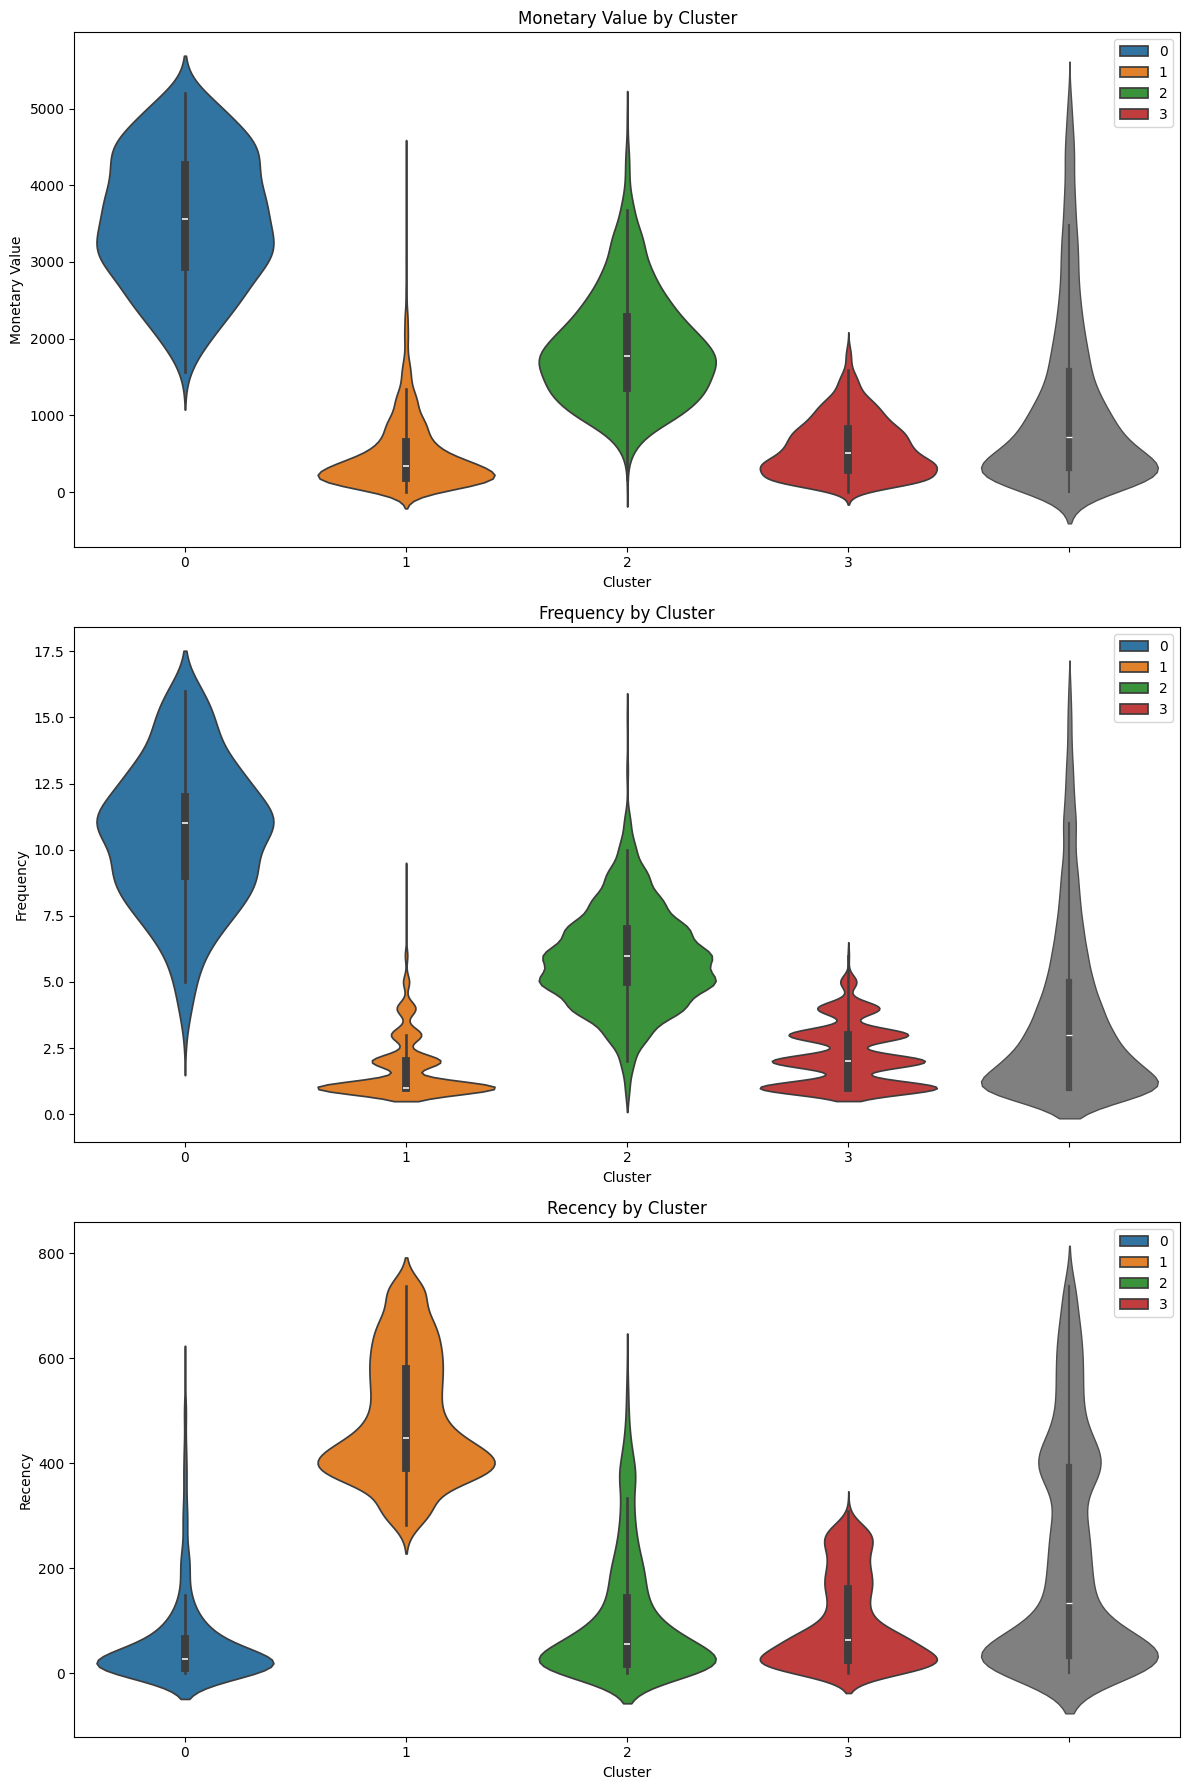

In [66]:
plt.figure(figsize=(12,18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outlier_df["Cluster"], y=non_outlier_df["MonetaryValue"], palette=cluster_colors, hue=non_outlier_df["Cluster"])
sns.violinplot(y=non_outlier_df["MonetaryValue"], color="gray", linewidth=1.0)
plt.title("Monetary Value by Cluster")
plt.ylabel("Monetary Value")

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outlier_df["Cluster"], y=non_outlier_df["Frequency"], palette=cluster_colors, hue=non_outlier_df["Cluster"])
sns.violinplot(y=non_outlier_df["Frequency"], color="gray", linewidth=1.0)
plt.title("Frequency by Cluster")
plt.ylabel("Frequency")

plt.subplot(3, 1, 3)
sns.violinplot(x=non_outlier_df["Cluster"], y=non_outlier_df["Recency"], palette=cluster_colors, hue=non_outlier_df["Cluster"])
sns.violinplot(y=non_outlier_df["Recency"], color="gray", linewidth=1.0)
plt.title("Recency by Cluster")
plt.ylabel("Recency")

plt.tight_layout()
plt.show()

## Outliers

In [68]:
overlap_indices = monetary_outlier_df.index.intersection(Frequency_outlier_df.index)

In [69]:
monetary_only_outliers = monetary_outlier_df.drop(overlap_indices)
frequency_only_outliers = Frequency_outlier_df.drop(overlap_indices)

monetary_and_frequency_outlier = monetary_outlier_df.loc[overlap_indices]

In [70]:
monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outlier["Cluster"] = -3

outlier_cluster_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outlier])

outlier_cluster_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,77352.96,3,2011-01-18 10:01:00,325,-1
1,12347.00,5633.32,8,2011-12-07 15:52:00,1,-1
10,12356.00,5613.68,6,2011-11-17 08:40:00,22,-1
11,12357.00,17437.66,2,2011-11-06 16:07:00,32,-1
13,12359.00,8935.94,10,2011-10-13 12:47:00,57,-1


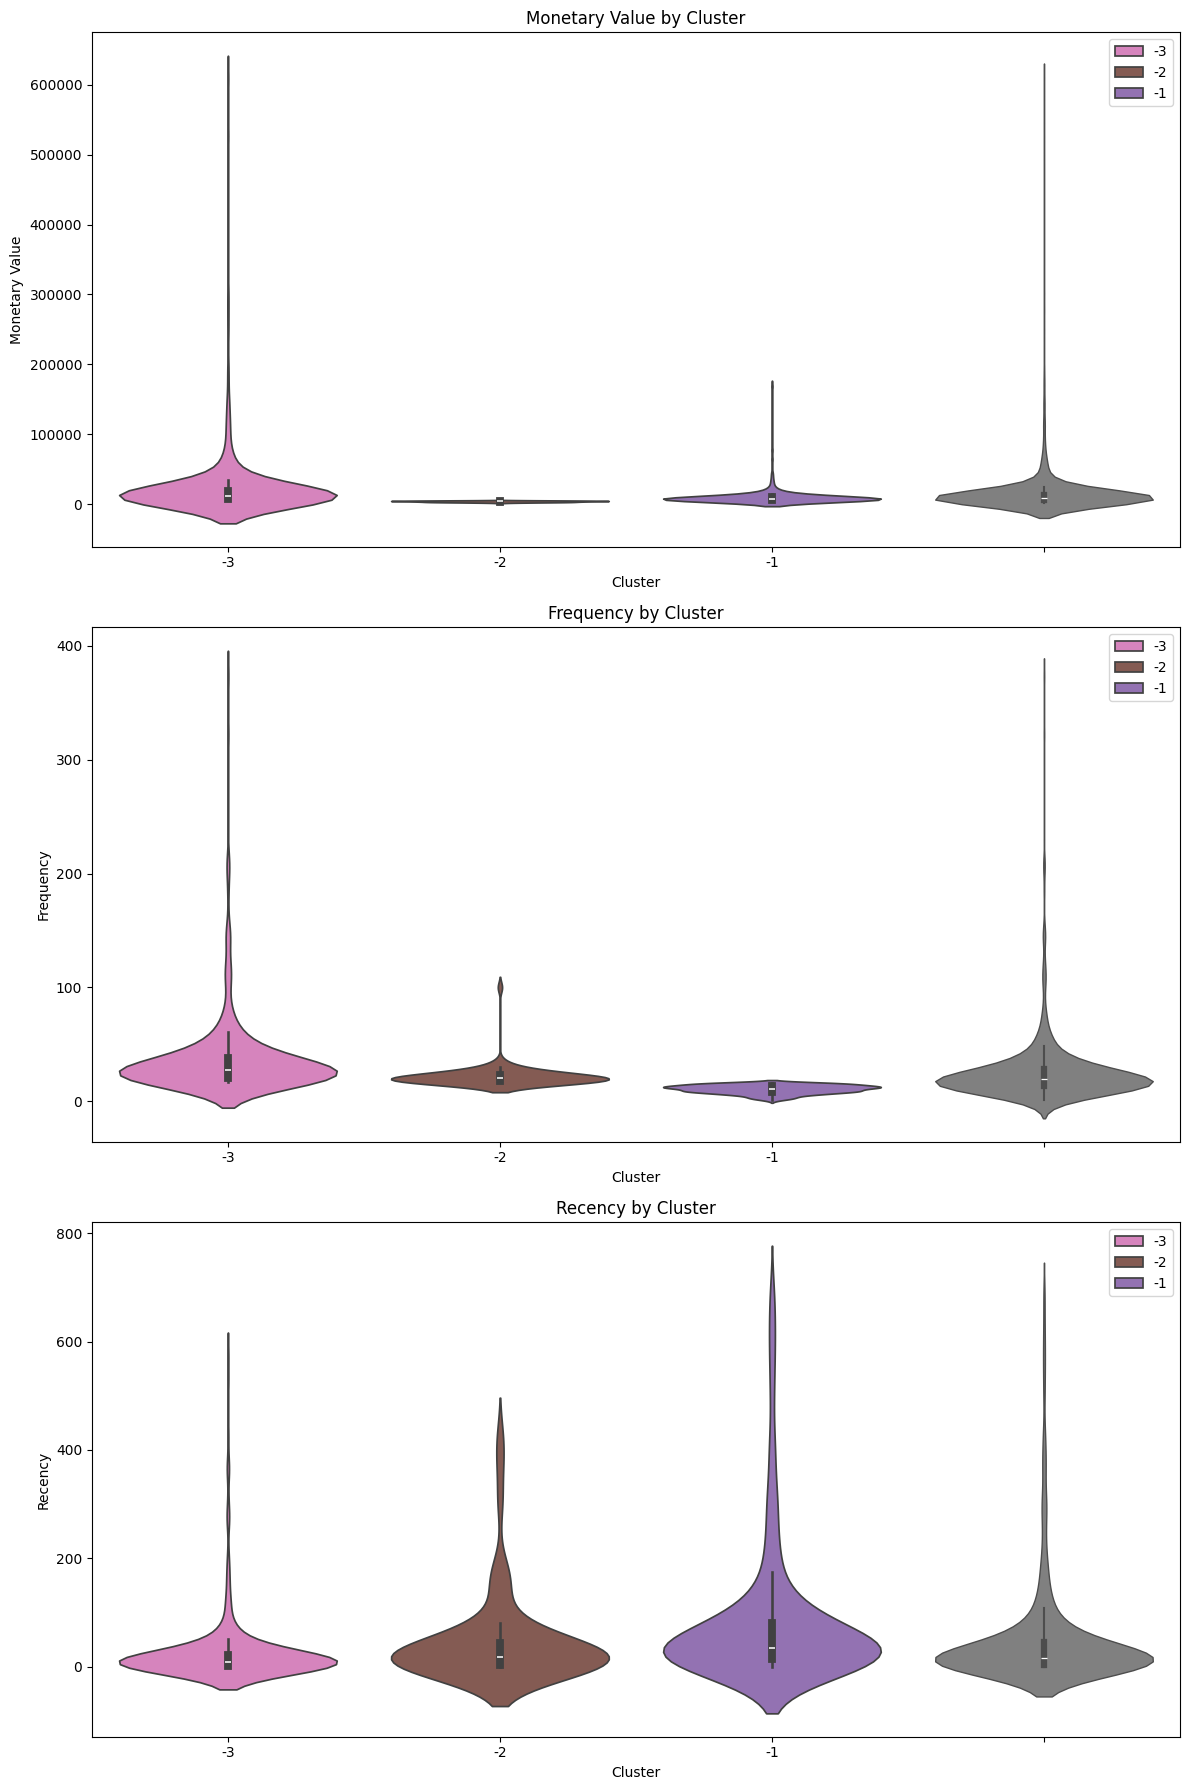

In [71]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12,18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_cluster_df["Cluster"], y=outlier_cluster_df["MonetaryValue"], palette=cluster_colors, hue=outlier_cluster_df["Cluster"])
sns.violinplot(y=outlier_cluster_df["MonetaryValue"], color="gray", linewidth=1.0)
plt.title("Monetary Value by Cluster")
plt.ylabel("Monetary Value")

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_cluster_df["Cluster"], y=outlier_cluster_df["Frequency"], palette=cluster_colors, hue=outlier_cluster_df["Cluster"])
sns.violinplot(y=outlier_cluster_df["Frequency"], color="gray", linewidth=1.0)
plt.title("Frequency by Cluster")
plt.ylabel("Frequency")

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_cluster_df["Cluster"], y=outlier_cluster_df["Recency"], palette=cluster_colors, hue=outlier_cluster_df["Cluster"])
sns.violinplot(y=outlier_cluster_df["Recency"], color="gray", linewidth=1.0)
plt.title("Recency by Cluster")
plt.ylabel("Recency")

plt.tight_layout()
plt.show()